In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
from sklearn.metrics import mean_squared_log_error as msle
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [36]:
dataset=pd.read_csv("Sunspots.csv")
dataset.drop(columns="Unnamed: 0",inplace=True)
dataset

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7
...,...,...
3247,2019-08-31,0.5
3248,2019-09-30,1.1
3249,2019-10-31,0.4
3250,2019-11-30,0.5


In [37]:
dataset["Date"]=pd.to_datetime(dataset["Date"],format="%Y-%m-%d")
dataset.set_index(dataset["Date"],inplace=True)
dataset.drop(columns="Date",inplace=True)
dataset

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7
...,...
2019-08-31,0.5
2019-09-30,1.1
2019-10-31,0.4


In [38]:
train_data,valid_data=dataset.loc[:"1969-12-31"]["Monthly Mean Total Sunspot Number"],dataset.loc["1970-01-31":]["Monthly Mean Total Sunspot Number"]

In [39]:
train_data

Date
1749-01-31     96.7
1749-02-28    104.3
1749-03-31    116.7
1749-04-30     92.8
1749-05-31    141.7
              ...  
1969-08-31    138.8
1969-09-30    129.3
1969-10-31    135.4
1969-11-30    132.4
1969-12-31    138.6
Name: Monthly Mean Total Sunspot Number, Length: 2652, dtype: float64

In [40]:
valid_data

Date
1970-01-31    157.9
1970-02-28    180.8
1970-03-31    145.7
1970-04-30    155.1
1970-05-31    180.5
              ...  
2019-08-31      0.5
2019-09-30      1.1
2019-10-31      0.4
2019-11-30      0.5
2019-12-31      1.6
Name: Monthly Mean Total Sunspot Number, Length: 600, dtype: float64

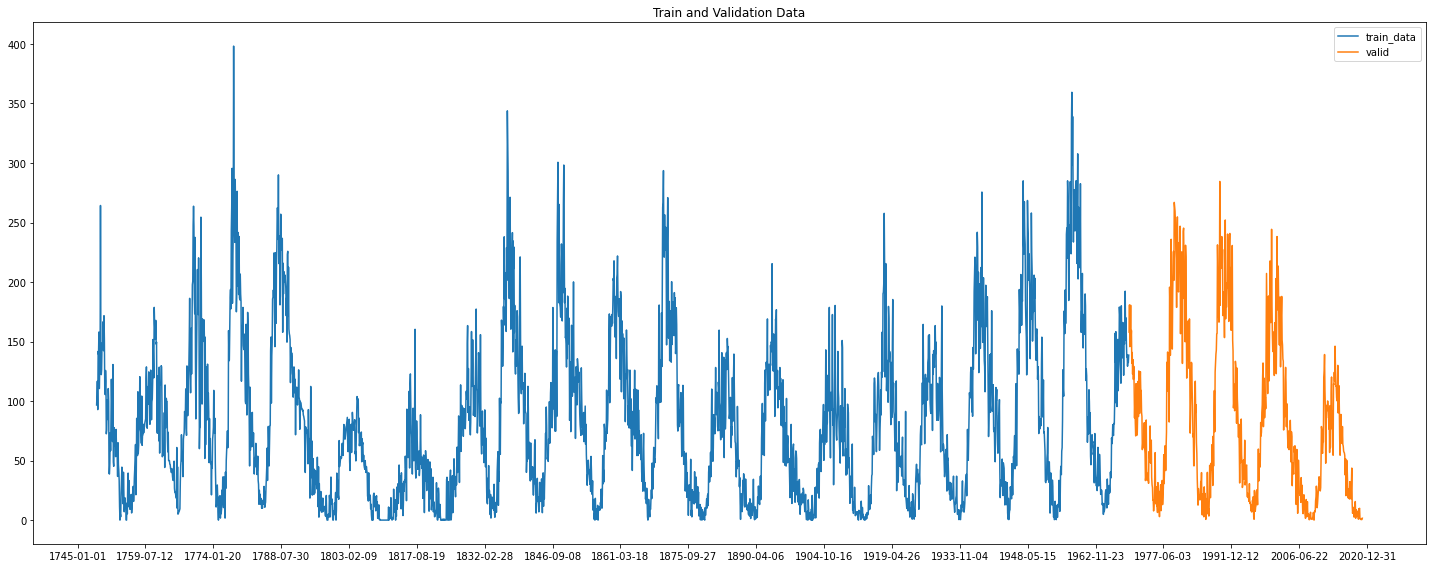

In [41]:
plt.figure(figsize=(20,8))

plt.plot(train_data.index, train_data, label='train_data')
plt.plot(valid_data.index,valid_data, label='valid')
plt.legend(loc='best')
plt.xticks(pd.date_range(start="1745-01-01",end="2020-12-31", periods=20).tolist())
plt.title("Train and Validation Data")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Date'>

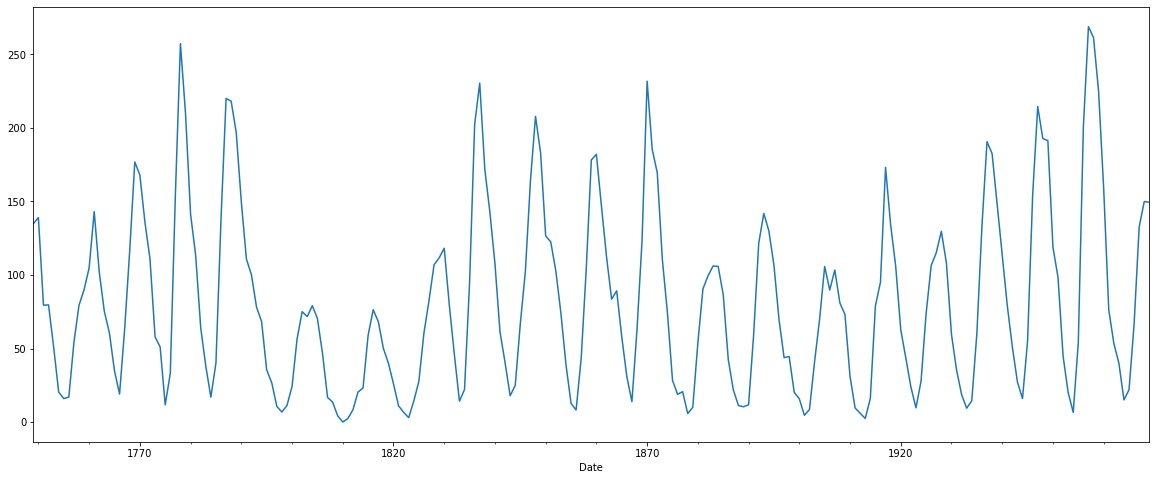

In [42]:
train_data.resample('Y').mean().plot(kind='line',figsize=(20,8))

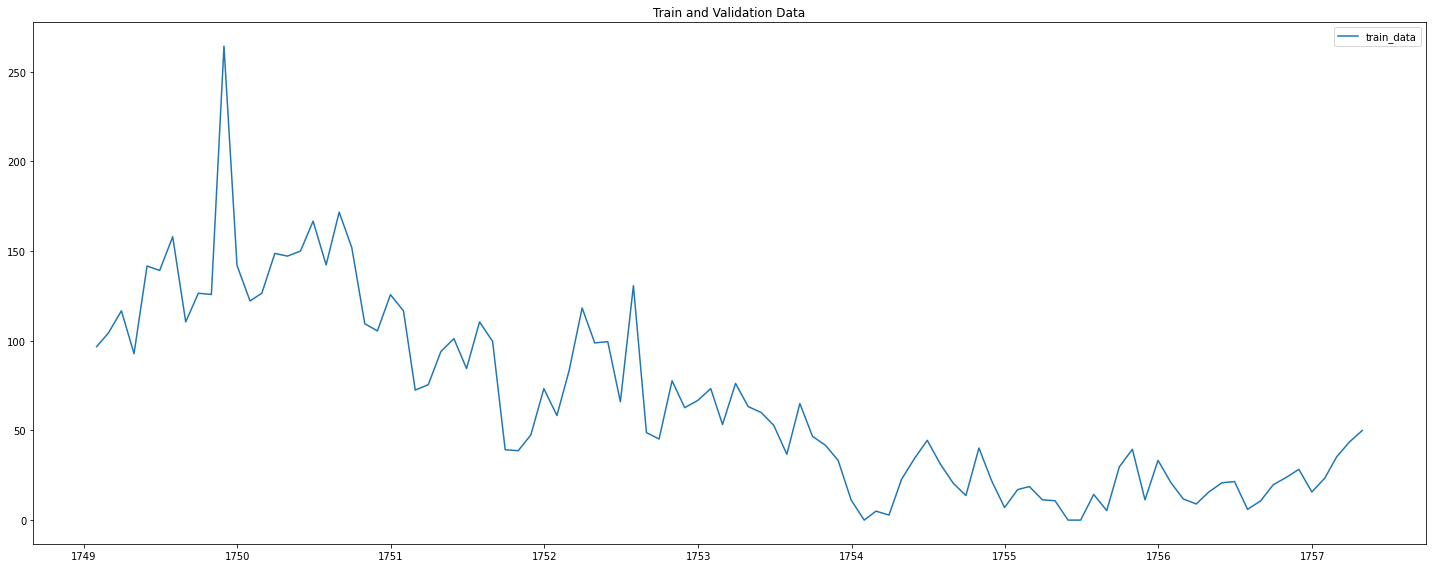

In [43]:
plt.figure(figsize=(20,8))

plt.plot(train_data.head(100).index, train_data.head(100), label='train_data')
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.tight_layout()
plt.show()

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [45]:
dec=seasonal_decompose(train_data)

<AxesSubplot:xlabel='Date'>

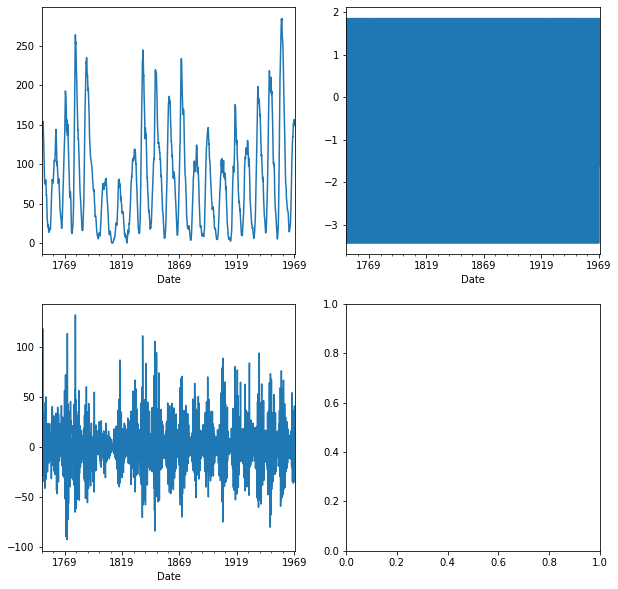

In [46]:
fig,axes=plt.subplots(2,2,figsize=(10,10))
dec.trend.plot(ax=axes[0,0])
dec.seasonal.plot(ax=axes[0,1])
dec.resid.plot(ax=axes[1,0])

## Stationarity Test

In [47]:
# dickey fuller, KPSS
from statsmodels.tsa.stattools import adfuller, kpss

In [48]:
def adf_test(timeseries):
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [49]:
adf_test(train_data)

Results of Dickey-Fuller Test:
Test Statistic                -9.230384e+00
p-value                        1.684592e-15
#Lags Used                     2.600000e+01
Number of Observations Used    2.625000e+03
Critical Value (1%)           -3.432844e+00
Critical Value (5%)           -2.862642e+00
Critical Value (10%)          -2.567356e+00
dtype: float64


In [50]:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [51]:
kpss_test(train_data)

Results of KPSS Test:
Test Statistic            0.147925
p-value                   0.100000
Lags Used                28.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


**The Time Series is Stationary**

## ACF and PACF

In [52]:
from statsmodels.tsa.stattools import acf, pacf

In [53]:
lag_acf = acf(train_data, nlags=1000) 
lag_pacf = pacf(train_data, nlags=30)

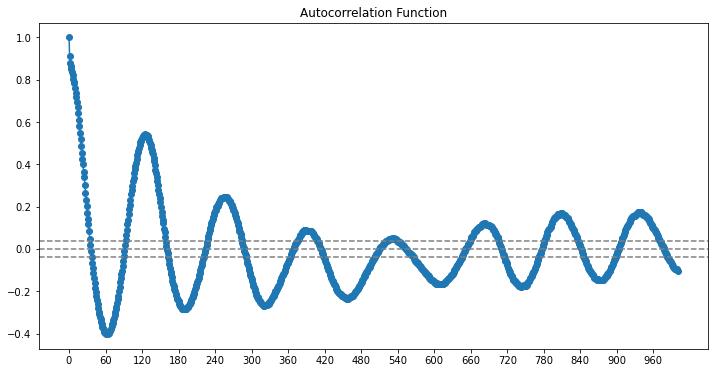

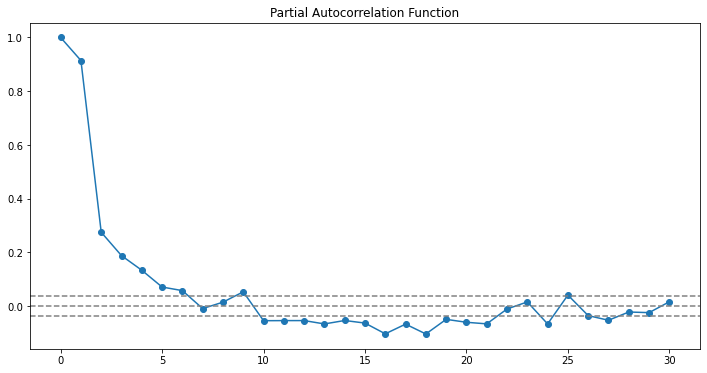

In [54]:
plt.figure(figsize=(12,6))

plt.plot(lag_acf,  marker='o')
plt.xticks(range(0,1000,60))
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_data.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_data.dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 
plt.show() 

plt.figure(figsize=(12,6))
plt.plot(lag_pacf, marker='o') 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_data.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_data.dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.show()

## ARMA

In [55]:
from statsmodels.tsa.api import ARMA

In [56]:
arma= ARMA(train_data,order=(6,0))
model_fit= arma.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      ARMA Model Results                                     
=============================================================================================
Dep. Variable:     Monthly Mean Total Sunspot Number   No. Observations:                 2652
Model:                                    ARMA(6, 0)   Log Likelihood              -12352.933
Method:                                      css-mle   S.D. of innovations             25.499
Date:                               Tue, 20 Oct 2020   AIC                          24721.866
Time:                                       21:50:01   BIC                          24768.930
Sample:                                   01-31-1749   HQIC                         24738.901
                                        - 12-31-1969                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      82.8042     12.498      6.625      0.000      58.309     107.300
ar.L1.Monthly Mean Total Sunspot Number     0.5731      0.019     29.572      0.000       0.535       0.611
ar.L2.Monthly Mean Total Sunspot Number     0.1173      0.022      5.250      0.000       0.073       0.161
ar.L3.Monthly Mean Total Sunspot Number     0.0914      0.022      4.082      0.000       0.048       0.135
ar.L4.Monthly Mean Total Sunspot Number     0.0837      0.022      3.736      0.000       0.040       0.128
ar.L5.Monthly Mean Total Sunspot Number     0.0378      0.022      1.692      0.091      -0.006       0.082
ar.L6.Monthly Mean Total Sunspot Number     0.0578      0.019      2.983      0.003       0.020       0.096
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0195           -0.0000j            1.0195           -0.0000
AR.2            0.8639           -1.4303j            1.6710           -0.1635
AR.3            0.8639           +1.4303j            1.6710            0.1635
AR.4           -1.8098           -0.0000j            1.8098           -0.5000
AR.5           -0.7957           -1.6506j            1.8324           -0.3215
AR.6           -0.7957           +1.6506j            1.8324            0.3215
-----------------------------------------------------------------------------
"""

In [57]:
train_data

Date
1749-01-31     96.7
1749-02-28    104.3
1749-03-31    116.7
1749-04-30     92.8
1749-05-31    141.7
              ...  
1969-08-31    138.8
1969-09-30    129.3
1969-10-31    135.4
1969-11-30    132.4
1969-12-31    138.6
Name: Monthly Mean Total Sunspot Number, Length: 2652, dtype: float64

In [58]:
valid_data

Date
1970-01-31    157.9
1970-02-28    180.8
1970-03-31    145.7
1970-04-30    155.1
1970-05-31    180.5
              ...  
2019-08-31      0.5
2019-09-30      1.1
2019-10-31      0.4
2019-11-30      0.5
2019-12-31      1.6
Name: Monthly Mean Total Sunspot Number, Length: 600, dtype: float64

In [59]:
valid_pred=model_fit.predict(start="1970-01-31",end="2019-12-31")
valid_pred

1970-01-31    134.552787
1970-02-28    132.935471
1970-03-31    131.531011
1970-04-30    130.924492
1970-05-31    129.986658
                 ...    
2019-08-31     82.804709
2019-09-30     82.804699
2019-10-31     82.804689
2019-11-30     82.804680
2019-12-31     82.804670
Freq: M, Length: 600, dtype: float64

In [60]:
np.sqrt(msle(valid_data,valid_pred))

1.3064134670261964

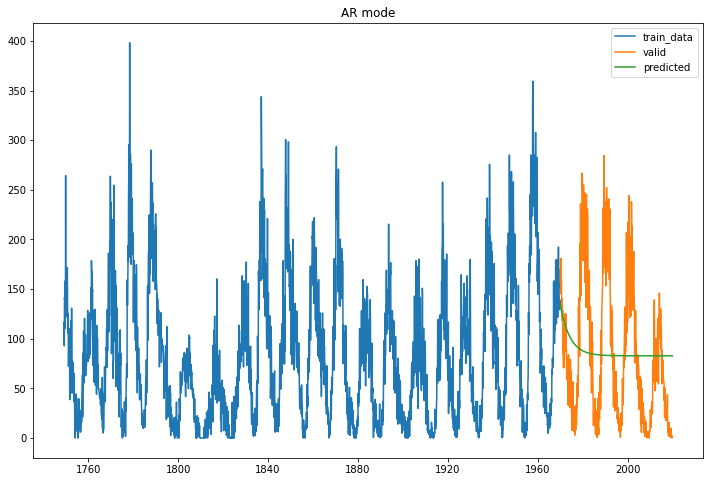

In [61]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data, label='train_data')
plt.plot(valid_data.index, valid_data, label='valid')
plt.plot(valid_data.index, valid_pred, label='predicted')

plt.legend(loc='best')
plt.title("AR mode")
plt.show()

## Seasonality lag ACF and PACF

In [29]:
from statsmodels.tsa.stattools import acf, pacf

In [30]:
train_lag=train_data-train_data.shift(43)

In [31]:
lag_acf = acf(train_lag.dropna(), nlags=400) 
lag_pacf = pacf(train_lag.dropna(), nlags=400)

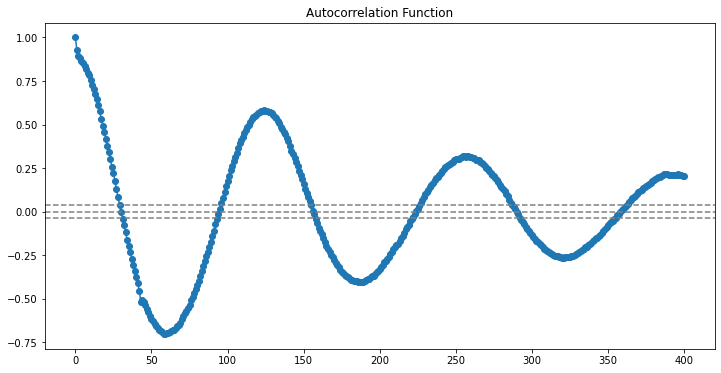

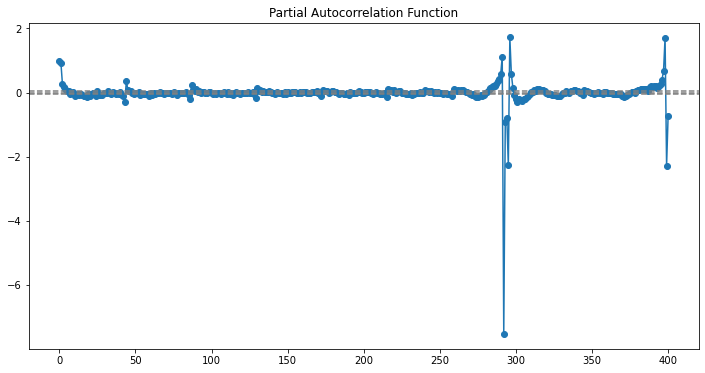

In [32]:
plt.figure(figsize=(12,6))

plt.plot(lag_acf,  marker='o') 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_lag.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_lag.dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 
plt.show() 

plt.figure(figsize=(12,6))
plt.plot(lag_pacf, marker='o') 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_lag.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_lag.dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.show()

## SARIMA

In [33]:
from statsmodels.tsa.api import SARIMAX

In [ ]:
sarima= SARIMAX(train_data,seasonal_order=(1,1,2,43),order=(1,0,1))
model_fit= sarima.fit()
model_fit.summary()

In [ ]:
valid_pred=model_fit.predict(start="1970-01-31",end="2019-12-31",dynamic=True)
valid_pred=list(map(lambda x: 0.01 if x<0 else x,valid_pred))
valid_pred

In [ ]:
np.sqrt(msle(valid_data,valid_pred))

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data, label='train_data')
plt.plot(valid_data.index, valid_data, label='valid')
plt.plot(valid_data.index, valid_pred, label='predicted')

plt.legend(loc='best')
plt.title("AR mode")
plt.show()